In [188]:
import numpy as np
import pandas as pd
import torch as T
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
T.manual_seed(0)

In [189]:
class NeuralNetwork(nn.Module):
    def __init__(self, input_dim, num_hidden1, num_hidden2, num_hidden3):
        super().__init__()
        self.linear1 = nn.Linear(input_dim, num_hidden1)
        self.linear2 = nn.Linear(num_hidden1, num_hidden2)
        self.linear3 = nn.Linear(num_hidden2, num_hidden3)
        self.linear4 = nn.Linear(num_hidden3, 1)
        self.tan = nn.Tanh()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        layer1 = self.linear1(x)
        act1 = self.tan(layer1)
        layer2 = self.linear2(act1)
        act2 = self.tan(layer2)
        layer3 = self.linear3(act2)
        act3 = self.tan(layer3)
        layer4 = self.linear4(act3)
        out = self.sigmoid(layer4)
        return out

In [190]:
data = pd.read_csv('data.csv', header=None)
X = T.tensor(data.drop(2, axis=1).values, dtype=T.float)
y = T.tensor(data[2].values, dtype=T.float).view(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

criterion = nn.BCELoss()
model = NeuralNetwork(X.shape[1], 10,10,10)

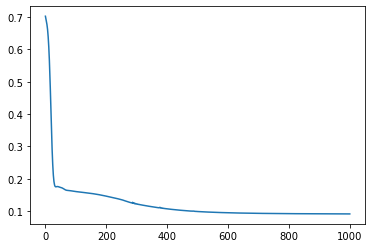

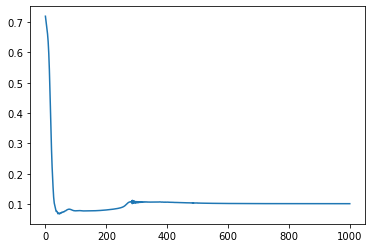

In [191]:
def torch_fit(X,y,X_train, X_test, y_train, y_test,model, criterion, lr, num_epochs):
    optimizer = T.optim.Adam(model.parameters(), lr)
    ls = []
    train_losses = []
    test_losses = []
    for epoch in range(num_epochs):
        optimizer.zero_grad()
        pred = model(X_train)
        loss_value = criterion(pred, y_train)
        train_losses.append(loss_value.item())
        #print(f'Epoch {epoch}, loss {loss_value.item():.2f}')
        loss_value.backward()
        optimizer.step()


    
        model.eval()
        with T.no_grad():
            test_preds = model.forward(X_test)
            test_loss = criterion(test_preds, y_test)
            test_losses.append(test_loss.item())

            #print(f'Epoch {epoch}, loss {test_loss.item():.2f}')

    #print(len(test_losses == train_losses) / len(test_losses)) 
    #print(test_losses)
    plt.plot(train_losses)
    plt.show()
    plt.plot(test_losses)
    plt.show()
model = torch_fit(X=X,y=y,X_train=X_train, X_test=X_test,y_train=y_train, y_test=y_test, model=model, criterion=criterion, lr=0.01, num_epochs=1000 )

In [192]:
#acc = len(y_test == pred ) / len(y_test)*100

In [193]:
dropout = nn.Dropout()
dropout.train()
print(dropout(X))
dropout.eval()
print(dropout(X))

tensor([[ 1.5610, -0.1273],
        [ 0.5755,  0.5828],
        [ 0.0000,  0.0000],
        [ 0.5846,  0.8434],
        [ 1.0184,  0.0000],
        [ 0.0000,  0.0000],
        [ 0.5505,  0.0000],
        [ 0.0000,  0.0000],
        [ 0.0000,  0.8597],
        [ 0.0000,  0.4997],
        [ 0.0169,  0.2732],
        [ 0.0000,  0.0000],
        [ 0.5129,  0.8525],
        [ 0.0000,  0.0000],
        [ 0.8909,  0.9023],
        [ 0.0000,  0.4024],
        [ 0.0000,  0.0000],
        [ 0.6170,  0.0000],
        [ 0.0000,  0.0000],
        [ 0.6589,  0.0000],
        [ 0.0000,  0.0000],
        [ 0.6212,  1.0140],
        [ 0.0000,  0.9077],
        [ 0.0000,  0.6411],
        [ 1.3981,  0.7461],
        [ 0.0000,  1.3930],
        [ 0.3020,  0.0000],
        [ 0.3285,  0.5552],
        [ 0.6652,  0.1119],
        [ 0.0000,  0.5727],
        [ 0.0000,  0.0000],
        [ 0.0000,  0.0703],
        [ 0.4259,  0.0000],
        [ 0.0000,  0.0000],
        [ 0.0000,  0.0000],
        [ 0.0000,  0